In [ ]:
!pip install finance-datareader
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 9.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot as plt
import FinanceDataReader as fdr
import koreanize_matplotlib
import numpy

# matplotlib 컬러 라이브러리 
from matplotlib import cm as cm
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 예측 변동률 불러오기
data = pd.read_csv('/content/주식_예측값.csv', index_col=0)

In [ ]:
returns = data.pct_change()[1:]


In [ ]:
# 회사 이름 저장 
companies = data.columns
len(companies)

26

## 랜덤 종목 추출해 변동성 분석 

Analyzing returns for:  하이브


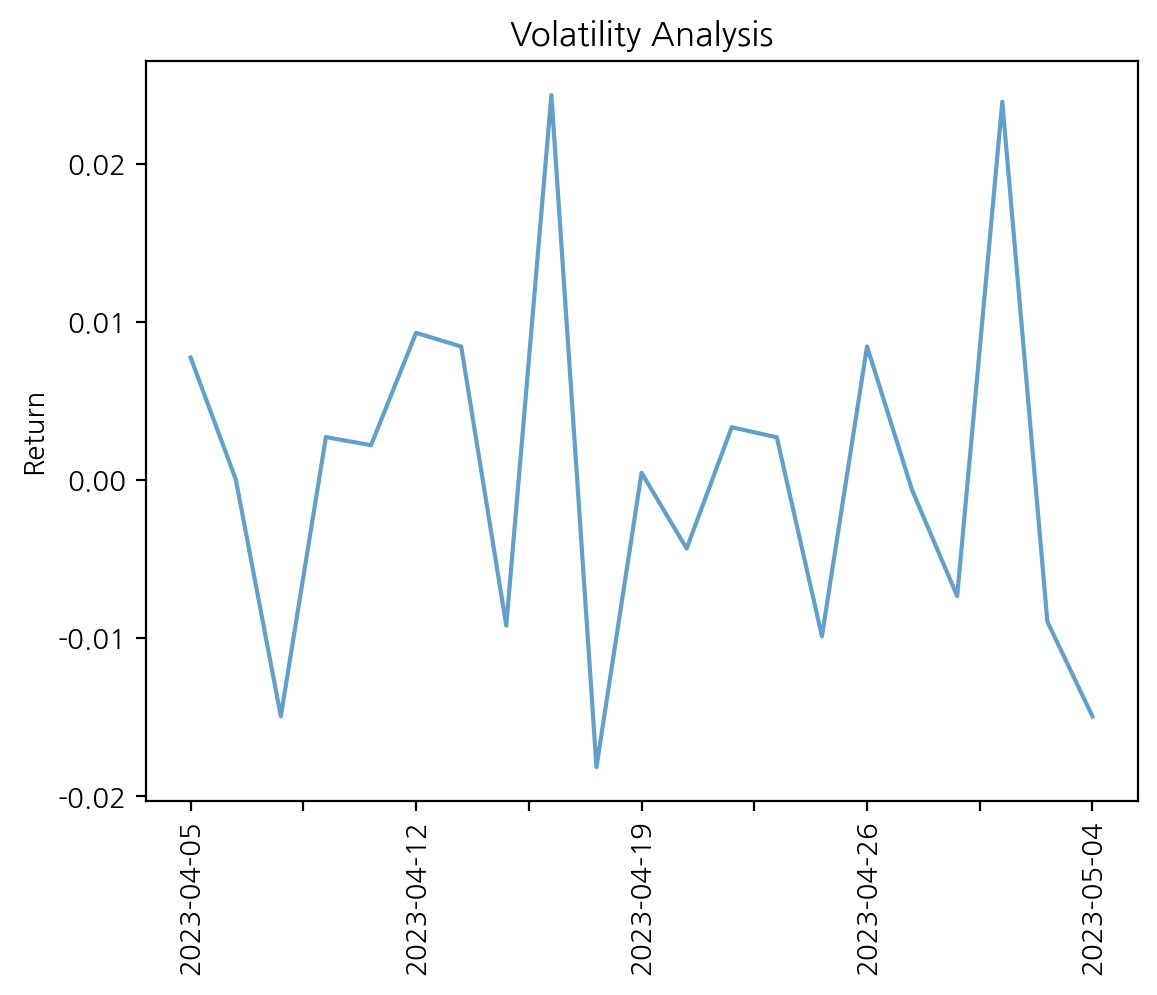

In [ ]:
ticker = companies[5]
print("Analyzing returns for: ", ticker)
plt.title('Volatility Analysis')
data[ticker].plot(alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel("Return")
plt.show()

Analyzing returns for:  하이브


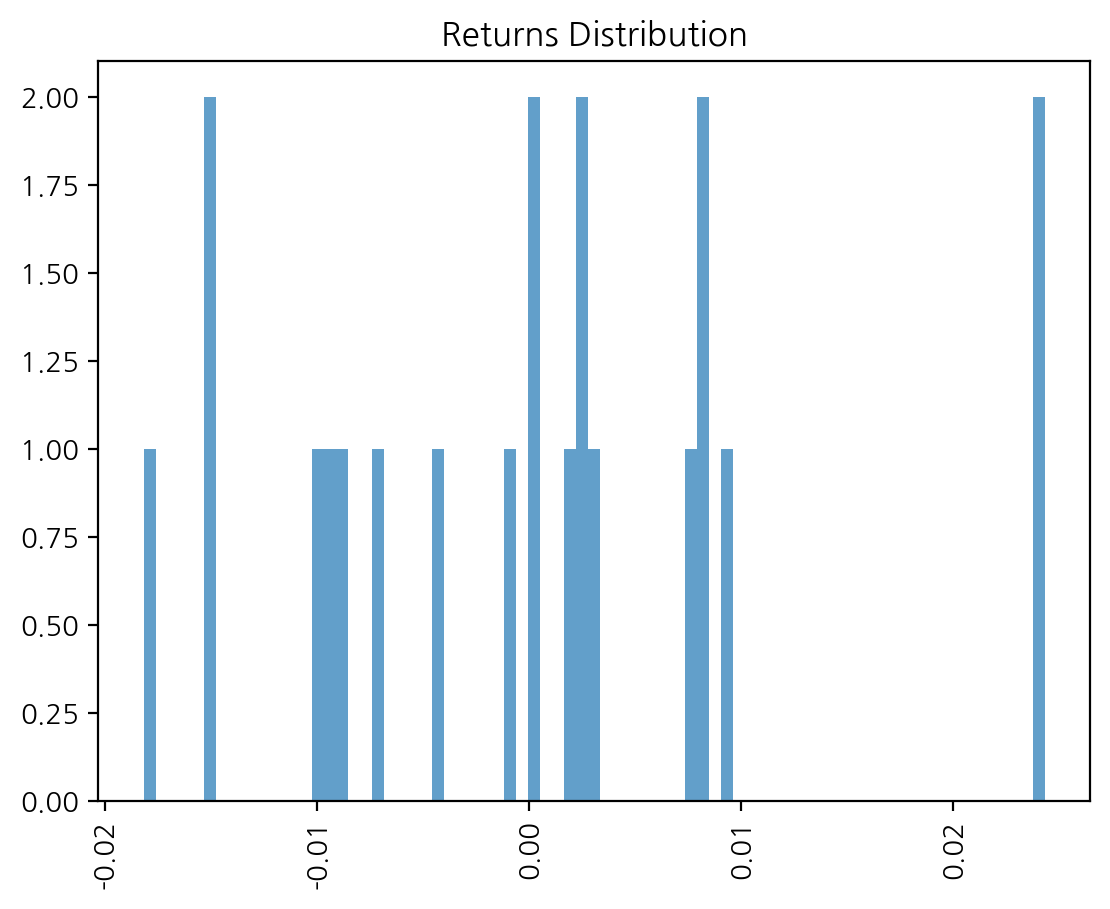

In [ ]:
print("Analyzing returns for: ", ticker)
plt.hist(data[ticker].dropna(), bins=75, density=False, alpha=0.7)
plt.title('Returns Distribution')
plt.xticks(rotation=90)
plt.show()

## 종목 간의 상관계수와 공분산 



In [ ]:
data_cov = data.cov()
data_corr = data.corr()

In [ ]:
np.round(data_corr,3)

,SK텔레콤,삼성화재,카카오뱅크,KT&G,SK,하이브,한국전력,하나금융지주,삼성생명,LG,...,셀트리온,포스코퓨처엠,POSCO홀딩스,NAVER,기아,삼성SDI,LG화학,삼성바이오로직스,SK하이닉스,LG에너지솔루션
SK텔레콤,1.000,-0.181,0.373,0.138,0.261,-0.017,0.021,0.762,-0.297,0.021,...,-0.113,-0.348,0.004,-0.138,0.304,0.036,-0.102,0.045,-0.254,-0.230
삼성화재,-0.181,1.000,-0.233,-0.144,-0.025,-0.116,0.371,0.131,-0.386,0.196,...,-0.171,0.216,-0.051,-0.301,-0.337,-0.024,-0.122,0.027,-0.240,-0.455
카카오뱅크,0.373,-0.233,1.000,0.038,0.322,0.442,-0.045,0.202,0.078,-0.253,...,-0.013,0.064,0.286,0.412,0.249,0.313,0.055,0.002,-0.083,-0.061
KT&G,0.138,-0.144,0.038,1.000,0.024,0.333,0.440,0.053,0.110,-0.054,...,0.170,0.089,0.367,0.179,-0.256,-0.060,0.033,0.388,0.122,-0.185
SK,0.261,-0.025,0.322,0.024,1.000,-0.215,-0.106,0.060,0.026,-0.086,...,-0.030,0.194,-0.037,0.091,0.154,-0.053,0.033,-0.073,-0.196,-0.067
하이브,-0.017,-0.116,0.442,0.333,-0.215,1.000,0.365,-0.022,0.157,-0.325,...,-0.060,0.256,0.353,0.645,-0.005,0.380,0.248,0.011,0.371,-0.009
한국전력,0.021,0.371,-0.045,0.440,-0.106,0.365,1.000,0.253,-0.262,-0.232,...,-0.340,-0.074,0.097,0.158,0.045,0.024,0.037,0.366,-0.185,-0.498
하나금융지주,0.762,0.131,0.202,0.053,0.060,-0.022,0.253,1.000,-0.367,-0.111,...,-0.239,-0.333,-0.102,-0.124,0.079,0.047,-0.120,-0.233,-0.143,-0.241
삼성생명,-0.297,-0.386,0.078,0.110,0.026,0.157,-0.262,-0.367,1.000,0.226,...,0.488,0.357,0.291,0.408,0.098,0.181,0.702,-0.003,0.359,0.600
LG,0.021,0.196,-0.253,-0.054,-0.086,-0.325,-0.232,-0.111,0.226,1.000,...,0.266,0.018,-0.131,-0.182,-0.107,-0.262,0.153,0.263,-0.245,0.063


## 히트맵 생성 

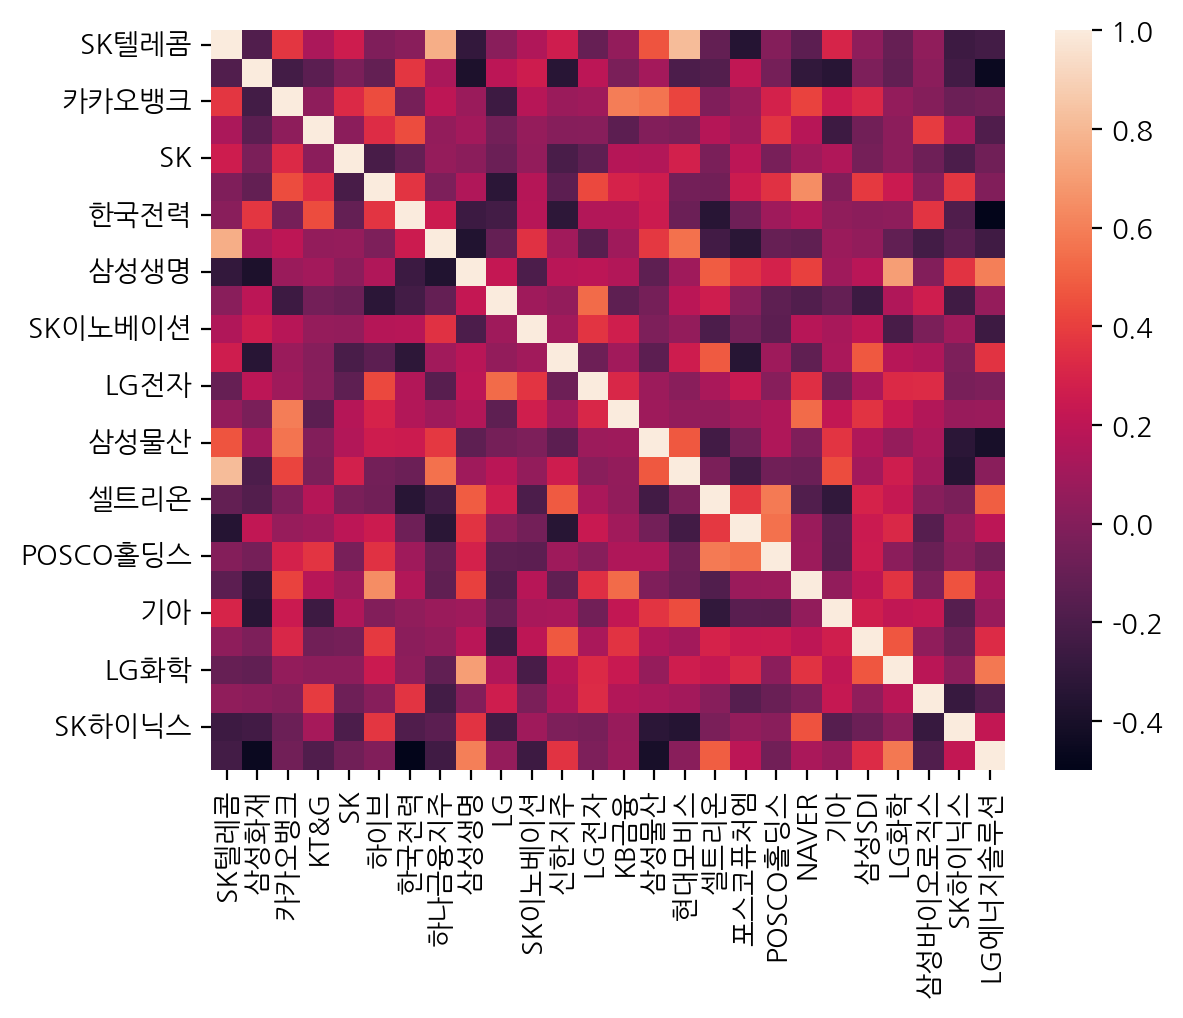

In [ ]:
import seaborn as sns 
sns.heatmap(data_corr);

In [ ]:
def correlation_matrix_plot(matrix, maptype):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    if (maptype == 'cmap'):
        cax = ax1.imshow(matrix, interpolation="nearest", cmap=cmap, alpha=0.7)
    else:
        cax = ax1.imshow(matrix, interpolation="nearest", cmap=maptype, alpha=0.7)
    ax1.grid(True)
    plt.title('Stocks Correlation')
    ax1.set_xticks(np.arange(len(companies)))
    ax1.set_yticks(np.arange(len(companies)))
    ax1.set_xticklabels(companies,fontsize=10,rotation=90)
    ax1.set_yticklabels(companies,fontsize=10)
    ax1.set_alpha(0.4)
    ticks = numpy.arange(0,9,1)
    fig.colorbar(cax)
    plt.show()


### 상관계수가 0.5 이하 인 종목끼리 같은 포트폴리오에 넣습니다.

<ipython-input-33-36e5f1741322>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)


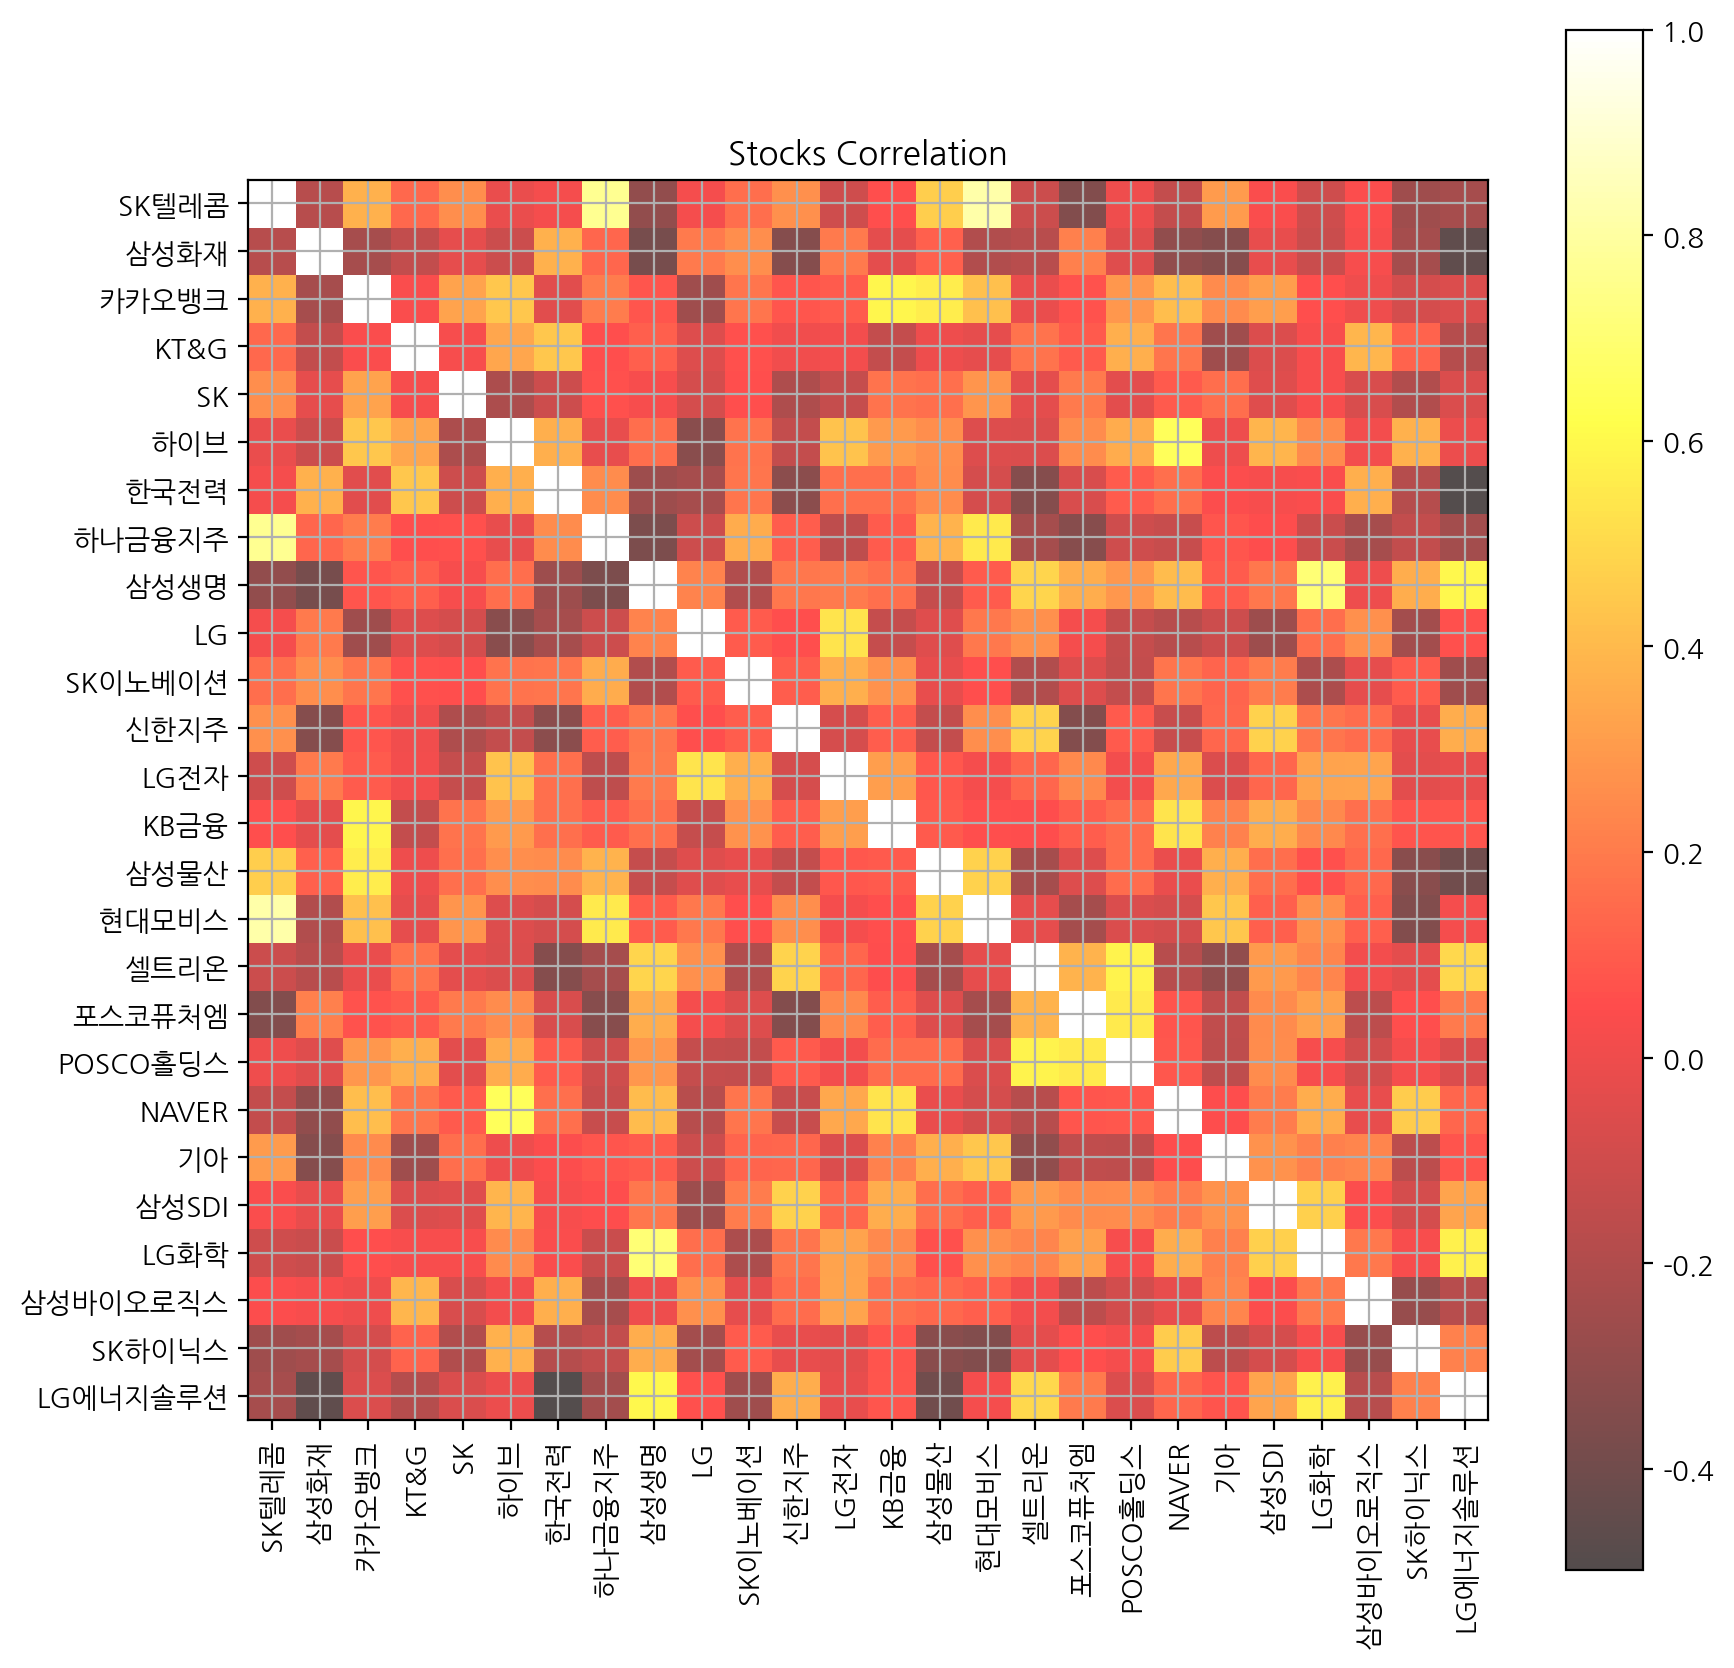

In [ ]:
# 상관계수가 0.5 이상이면 같은 종목끼리 리스크가 더욱 증가할 수 있어서 상관계수 0.5 이상은 같은 포트폴리오에 적합하지 않습니다. 
correlation_matrix_plot(data_corr,'hot');

## 특정 주식을 한 쌍으로 함께 사용할 수 있는지 확인하기

- 한 쌍의 주식이 공분산 및 상관관계 기준치를 모두 충족하면 함께 페어링할 수 있습니다. 
- 아래 그림은 페어링 가능한 종목을 파란색으로, 페어링 불가능한 종목을 녹색으로 표시합니다.

In [ ]:
mean_Covariance = data_cov.mean()


In [ ]:
def get_pairable(data, Covariance, Correlation):
    Pairable = np.zeros(Covariance.shape)
    plt.figure(figsize=(12,7))

    for i in range(len(companies)):
        for j in range(len(companies)-i):
            # 각 종목의 평균 공분산이 두 개의 종목 중 하나의 공분산보다 높거나 상관계수가 0.5이상인 값은 초록색 
            if(Covariance[i,j] > mean_Covariance[i] or Covariance[i,j] > mean_Covariance[j] or Correlation[i][j]>0.5):
                plt.plot(i, j, 'o', color='green', alpha=0.5) 
            else:
                plt.plot(i, j, 'o', color='blue', alpha=0.5)
                Pairable[i,j] = 1

    plt.xlim(-1,len(companies)+1)
    plt.ylim(-1,len(companies)+1)
    plt.xticks(range(len(companies)), companies, rotation=40)    
    plt.yticks(range(len(companies)), companies)
    #plt.set_xticklabels(companies,fontsize=10,rotation=40)
    plt.legend()
    return Pairable


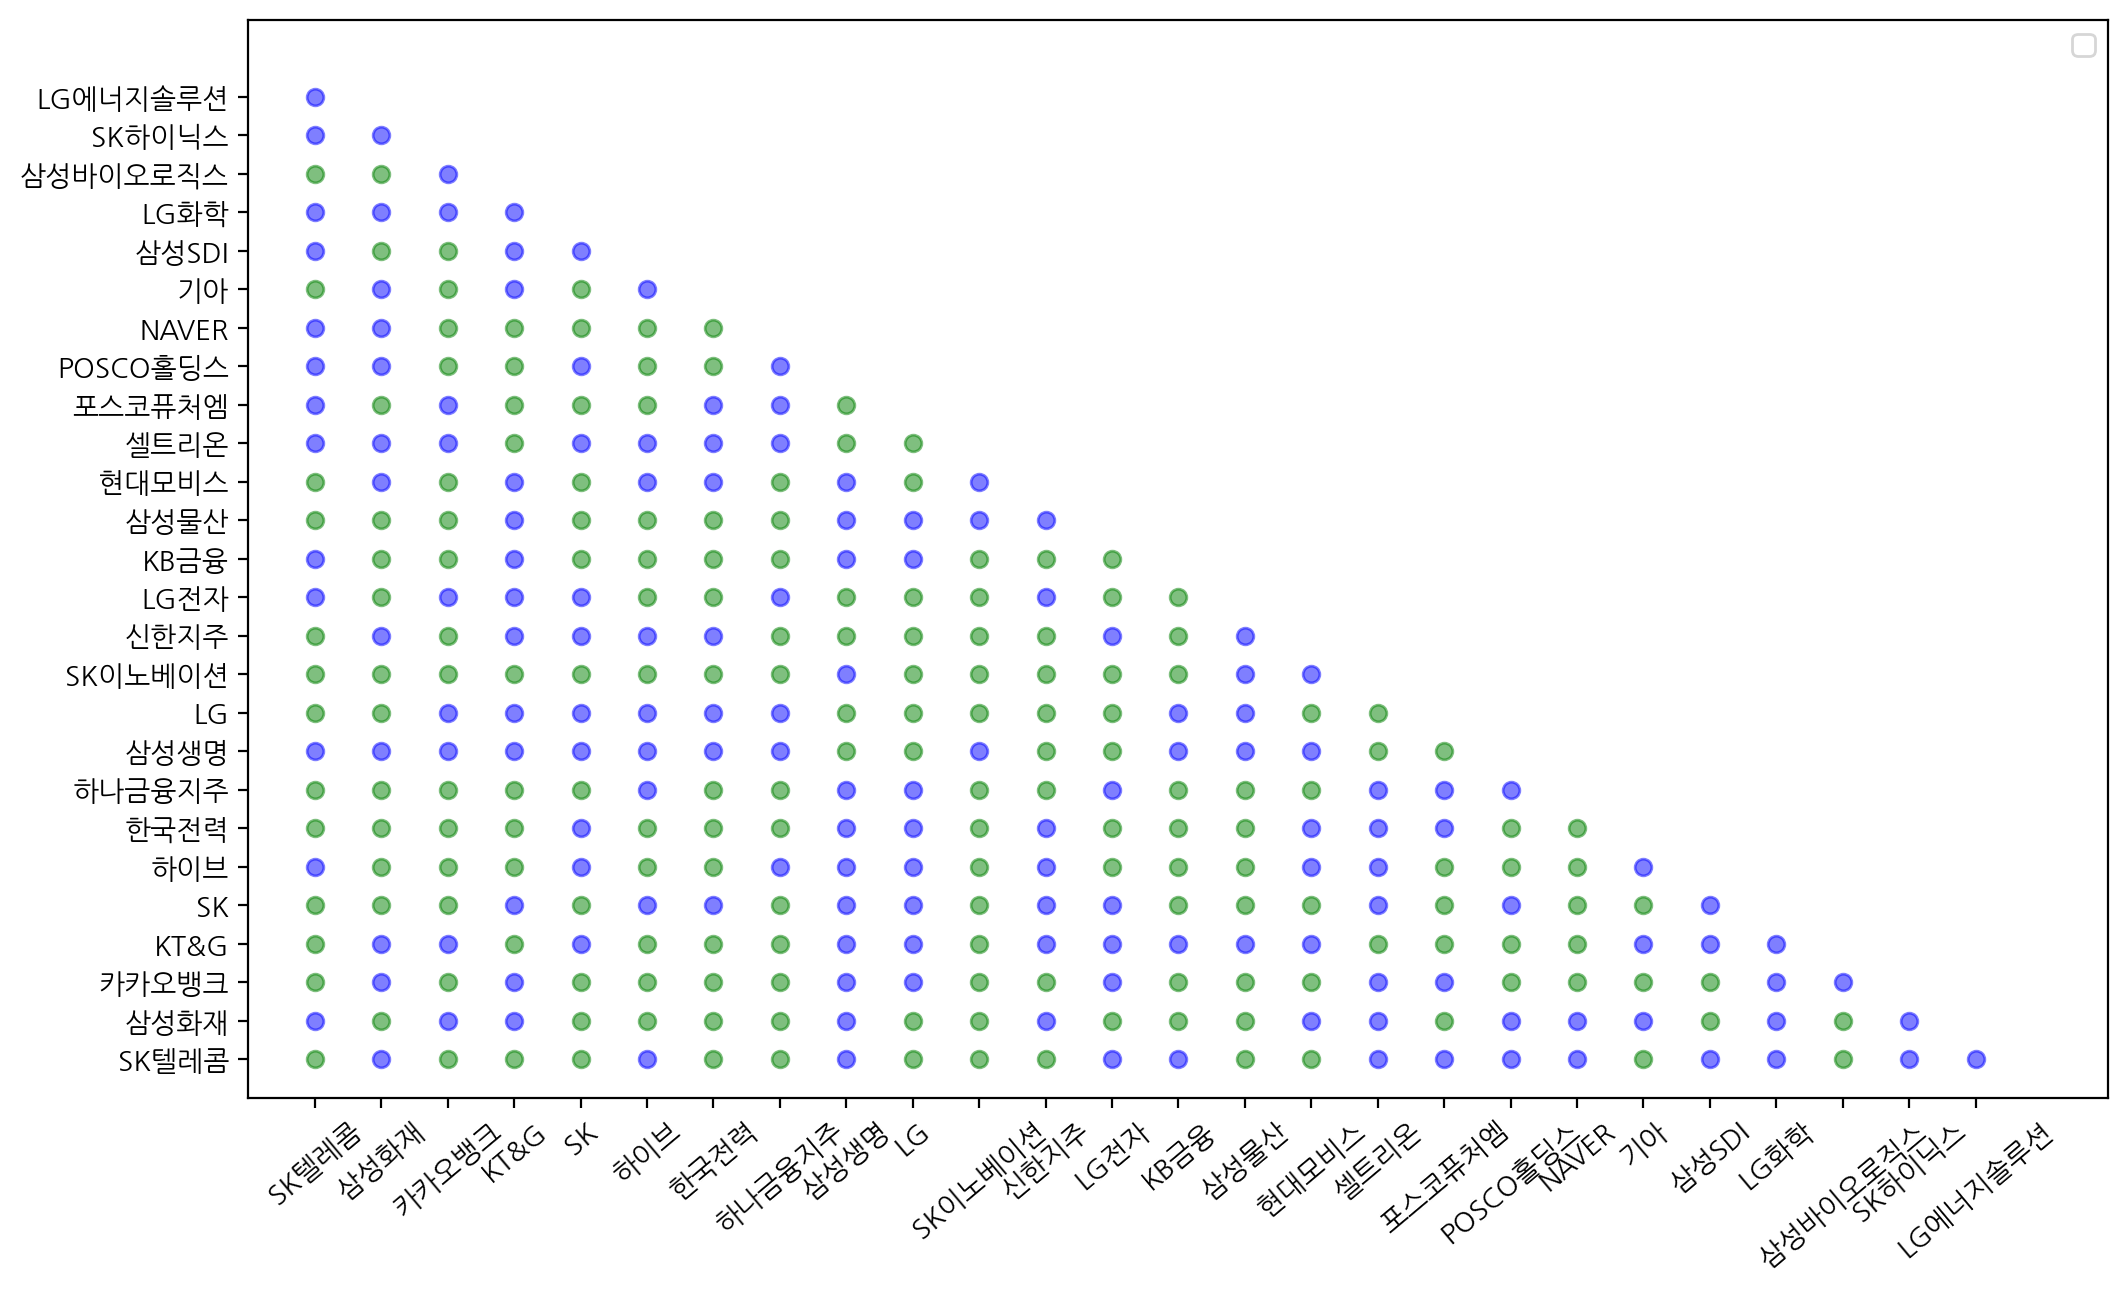

In [ ]:
Pairable = get_pairable(data,np.array(data_cov), np.array(data_corr))


## 샤프 비율(Sharpe Ratio) 계산
- 샤프 비율이란? 
- 샤프지수는 펀드 수익률에서 무위험 수익률을 빼고 난 값을 펀드 위험으로 나누어 계산한다

- 샤프비율 = (Rp - Rf)/SigmaP
- Rp: 포트폴리오 수익률/평균 수익률
- Rf(무위험 지표 금리) : 4월 28일 기준 3.567%
    - 링크 : https://www.kofr.kr/main.jsp
- 시그마P: 포트폴리오 초과 수익률의 표준편차
<br>
- 샤프 비율이 높을수록 위험조정 수익률이 높다는 의미입니다.
- 샤프 비율 > 1은 양호한 것으로 간주
- 샤프 비율 > 2는 매우 양호한 것으로 간주됩니다.
- 샤프 비율 > 3은 우수로 간주

In [ ]:
Rf = 0.03567  
stocks_rng = range(len(companies))

def sharpe_ratio(pair, portfolio_weights, meanR, cov):    
    Rp = portfolio_weights.dot(meanR.T) 
    SigmaP = portfolio_weights.dot(cov.dot(portfolio_weights.T)) * len(data)
    s_ratio = (Rp - Rf)/np.sqrt(SigmaP)
    return s_ratio

# portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, 
#                             np.dot(cov_mat_annual, portfolio_weights)))

## 선택한 쌍에 다른 종목을 추가할 수 있는지 확인하기
- 쌍과 상관관계가 없는 다른 모든 주식은 쌍과 동일한 포트폴리오에 포함될 수 있습니다.

In [ ]:
def check_pairs(pair):
    not_in_pair = []
    for i in stocks_rng:
        if(i not in pair):
            not_in_pair.append(i)
        else:
            continue
            
    for tick in not_in_pair:
        total_pair = len(pair)
        for i in pair:
            if(Pairable[tick,i]!=1 or Pairable[i,tick]!=1):
                total_pair -= 1
        if(float(total_pair)/len(pair) > 0.5):
            pair.add(tick)              
    return pair

## 최적의 포트폴리오 선택

- 주어진 티커 목록에서 가능한 모든 쌍 조합을 생성합니다. 예를 들어 티커가 n개인 경우 가능한 쌍은 nC2가 될 수 있습니다.

- 각 페어에 대해 상관관계와 공분산 값을 확인하여 함께 추가할 수 있는 다른 종목을 확인하고 동일한 포트폴리오에 추가합니다.

- 샤프 비율이 좋은, 더 좋은, 가장 좋은 포트폴리오는 별도로 저장됩니다.

In [ ]:
portfolio_collection = []
optim = {'good':[],'better':[],'best': []}

def select(combo):
    pair = set(combo)
    pair = check_pairs(pair)
    #print("new pair by checking pairable: ", pair)
    if pair in portfolio_collection:
        #print('returning')
        return
    portfolio_collection.append(pair)
    #print("portfoilio: ", portfolio_collection)
    sharpe_r = 0
    eff_weights = np.ones(len(pair))

    symbols = [companies[s] for s in pair]        
    mean_returns = np.array(data[symbols].mean()) * len(data)
    sub_cov_mat = np.array(data[symbols].cov())        

    for _ in range(200):
        weights = [np.random.randint(50,500) for _ in pair]
        weights = np.array(weights, dtype=float)
        weights /= weights.sum()
        s_r = sharpe_ratio(pair, weights, mean_returns, sub_cov_mat)
        if( s_r > sharpe_r):
            sharpe_r = s_r
            eff_weights = weights
        
    if (sharpe_r >= 1 and sharpe_r < 2) :
        optim['good'].append([[companies[s] for s in pair],eff_weights,sharpe_r])
    if (sharpe_r >= 2 and sharpe_r < 3) :
        optim['better'].append([[companies[s] for s in pair],eff_weights,sharpe_r])
    if(sharpe_r >=3) :
        optim['best'].append([[companies[s] for s in pair],eff_weights,sharpe_r])

In [ ]:
from itertools import combinations
count=0
run = list(combinations(stocks_rng,2))
for combo in run:
    count +=1
    if(Pairable[combo[0],combo[1]]!=1 or Pairable[combo[1],combo[0]]!=1):
        continue
    else:
        #print("taking the combo")
        select(combo)
print("number of combinations: ", count)


number of combinations:  325


In [ ]:
optim['good']

[]

In [ ]:
optim['better']

[[['SK텔레콤', '삼성화재', '카카오뱅크', 'KT&G', '삼성생명', 'LG전자', 'LG화학'],
  array([0.05248869, 0.16832579, 0.05972851, 0.31131222, 0.04977376,
         0.31221719, 0.04615385]),
  2.1429729654875835],
 [['SK텔레콤', '삼성화재', '카카오뱅크', 'KT&G', '삼성생명', 'LG화학'],
  array([0.1357268 , 0.10945709, 0.20052539, 0.42206655, 0.07180385,
         0.06042032]),
  2.315542872349376],
 [['삼성화재', '카카오뱅크', 'KT&G', '삼성생명', '현대모비스', 'LG화학'],
  array([0.20943396, 0.12075472, 0.36226415, 0.1245283 , 0.05      ,
         0.13301887]),
  2.057132611664534],
 [['삼성화재', 'KT&G', 'SK', '삼성생명', '신한지주', 'LG전자'],
  array([0.06934307, 0.44708029, 0.18521898, 0.0830292 , 0.15145985,
         0.06386861]),
  2.6320589058506654],
 [['삼성생명', '삼성화재', 'KT&G', '현대모비스'],
  array([0.05924413, 0.29826353, 0.46475996, 0.17773238]),
  2.8548951372238767],
 [['삼성화재', 'KT&G', '삼성생명', '현대모비스', '기아'],
  array([0.23541667, 0.4375    , 0.075     , 0.14479167, 0.10729167]),
  2.9559755459863846],
 [['카카오뱅크', 'KT&G', 'SK', '삼성생명', 'LG', 'LG전자'],
  arr

In [ ]:
optim['best']

[[['KT&G', '신한지주', 'LG전자', 'SK'],
  array([0.64153439, 0.08465608, 0.16269841, 0.11111111]),
  3.209923278658081]]

In [ ]:
better = pd.DataFrame.from_dict(optim['better'])
better.columns = ['Portfolio', 'Weights', 'Sharpe Ratio']


In [ ]:
better.iterrows()

<generator object DataFrame.iterrows at 0x7fcc987f1620>

In [ ]:
portfolio_return = []

for row in better.iterrows():
    #print(row[1][0])
    mean = np.array(returns[row[1][0]].mean()) * len(returns)
    #mean = ((1+np.mean(returns[row[1][0]]))**252)-1 #annulazied return for 252 trading days
    portfolio_weights = np.array(row[1][1])
    Rp = portfolio_weights.dot(mean.T) 
    portfolio_return.append(round(Rp * 100, 2))
    #print('Rp:', Rp)
    
better['Portfolio Return'] = portfolio_return

In [ ]:
portfolio_volatility = []

for row in better.iterrows():
    portfolio = row[1][0]
    portfolio_weights = row[1][1]
    portfolio_data = data[portfolio]
    portfolio = portfolio_data.mul(portfolio_weights,axis=1).sum(axis=1)
    volatility = np.std(portfolio)
    portfolio_volatility.append(volatility)

better['Portfolio Volatility'] = portfolio_volatility
better

,Portfolio,Weights,Sharpe Ratio,Portfolio Return,Portfolio Volatility
0,"[SK텔레콤, 삼성화재, 카카오뱅크, KT&G, 삼성생명, LG전자, LG화학]","[0.05248868778280543, 0.16832579185520363, 0.0...",2.142973,-2410.73,0.007770
1,"[SK텔레콤, 삼성화재, 카카오뱅크, KT&G, 삼성생명, LG화학]","[0.13572679509632224, 0.10945709281961472, 0.2...",2.315543,-3141.73,0.010717
2,"[삼성화재, 카카오뱅크, KT&G, 삼성생명, 현대모비스, LG화학]","[0.20943396226415095, 0.12075471698113208, 0.3...",2.057133,-3510.19,0.009208
3,"[삼성화재, KT&G, SK, 삼성생명, 신한지주, LG전자]","[0.06934306569343066, 0.4470802919708029, 0.18...",2.632059,-385.53,0.013619
4,"[삼성생명, 삼성화재, KT&G, 현대모비스]","[0.059244126659857, 0.2982635342185904, 0.4647...",2.854895,2401.29,0.009576
5,"[삼성화재, KT&G, 삼성생명, 현대모비스, 기아]","[0.23541666666666666, 0.4375, 0.075, 0.1447916...",2.955976,1621.97,0.008895
6,"[카카오뱅크, KT&G, SK, 삼성생명, LG, LG전자]","[0.04916732751784298, 0.3679619349722443, 0.11...",2.288754,2988.09,0.008449
7,"[삼성화재, 카카오뱅크, KT&G, 삼성생명, 현대모비스, 셀트리온]","[0.12746858168761221, 0.17055655296229802, 0.4...",2.144220,1040.36,0.011095
8,"[KT&G, SK, 삼성생명, LG, KB금융, 삼성물산]","[0.32377740303541314, 0.3676222596964587, 0.04...",2.639069,-2040.58,0.007200
9,"[삼성화재, 카카오뱅크, KT&G, 삼성생명, 신한지주, LG전자]","[0.39875111507582517, 0.1320249776984835, 0.25...",2.397331,1149.01,0.006351


In [ ]:
better.to_csv('샤프비율_2~3_포트폴리오.csv')

In [ ]:
better['PortfolioL'] = better['Portfolio'].apply(lambda x: ','.join(map(str, x)))


<ipython-input-58-5ce4807d4343>:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(better['PortfolioL'], better['Sharpe Ratio'], 'g-', alpha=0.6, marker='o',
<ipython-input-58-5ce4807d4343>:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(better['PortfolioL'], better['Portfolio Return'], 'b-', alpha=0.6, marker='o',


<Figure size 1400x500 with 0 Axes>

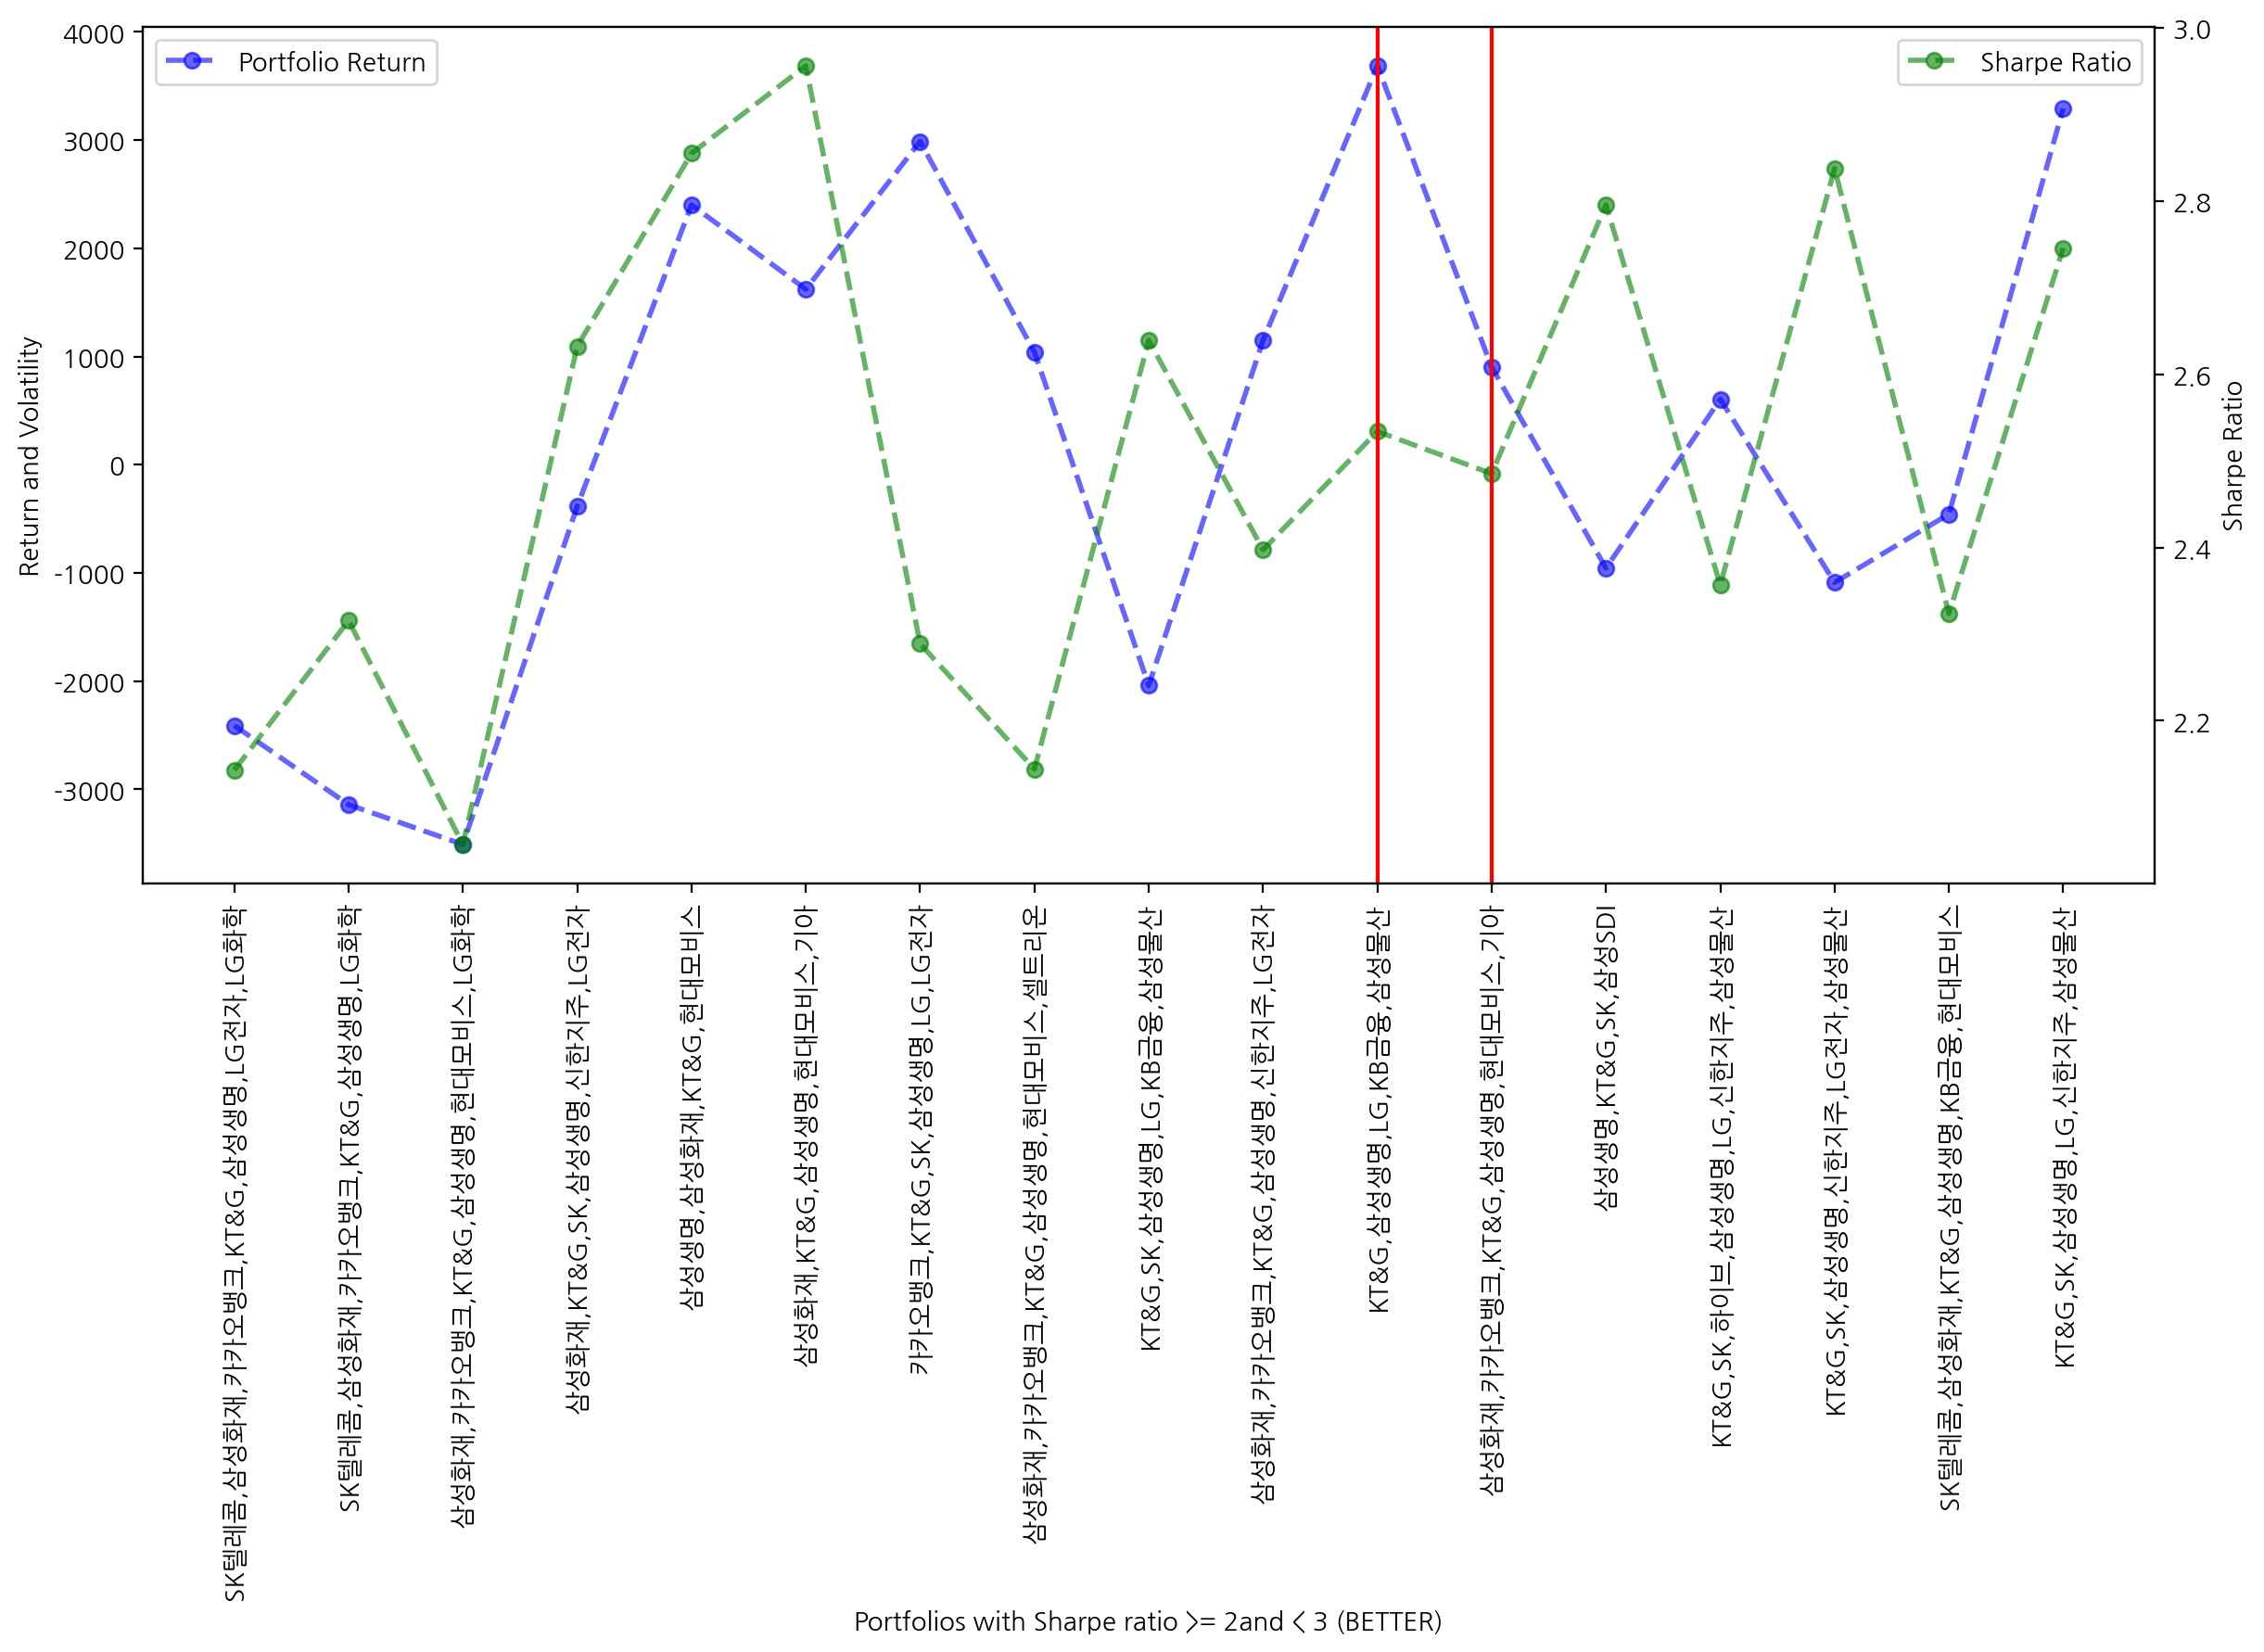

In [ ]:
plt.figure(figsize=(14,5))
fig, ax1 = plt.subplots(figsize=(14,6))

ax2 = ax1.twinx()
ax2.plot(better['PortfolioL'], better['Sharpe Ratio'], 'g-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6, label='Sharpe Ratio')
ax1.plot(better['PortfolioL'], better['Portfolio Return'], 'b-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6, label='Portfolio Return')

ax1.set_xlabel('Portfolios with Sharpe ratio >= 2and < 3 (BETTER)')
ax1.set_ylabel('Return and Volatility')
ax2.set_ylabel('Sharpe Ratio')
ax1.xaxis.set_tick_params(rotation=90)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.axvline(x=10, linestyle='-', color='r')
plt.axvline(x=11, linestyle='-', color='r')
#ax2.set_alpha(0.4)
#ax1.set_alpha(0.4)
plt.show()


In [ ]:
best = pd.DataFrame.from_dict(optim['best'])
best.columns = ['Portfolio', 'Weights', 'Sharpe Ratio']
portfolio_return = []

for row in best.iterrows():
    #print(row[1][0])
    mean = np.array(data[row[1][0]].mean()) * len(data)
    portfolio_weights = np.array(row[1][1])
    Rp = portfolio_weights.dot(mean.T) 
    portfolio_return.append(round(Rp * 100, 2))
    
best['Portfolio Return'] = portfolio_return

portfolio_volatility = []

for row in best.iterrows():
    portfolio = row[1][0]
    portfolio_weights = row[1][1]
    portfolio_data = data[portfolio]
    portfolio = portfolio_data.mul(portfolio_weights,axis=1).sum(axis=1)
    volatility = np.std(portfolio)
    portfolio_volatility.append(volatility)

best['Portfolio Volatility'] = portfolio_volatility
best

,Portfolio,Weights,Sharpe Ratio,Portfolio Return,Portfolio Volatility
0,"[KT&G, 신한지주, LG전자, SK]","[0.6415343915343915, 0.08465608465608465, 0.16...",3.209923,24.91,0.014163


In [ ]:
best.to_csv('샤프비율_3이상_포트폴리오.csv')